# Practical 10 - Machine Learning

## Introduction to Supervised Learning: Regression


## Context and Problem

- An interesting application of regression is to quantify the effect of advertisement on sales. Various channels of advertisement are newspaper, TV, radio, etc. 
- In this case study, we will have a look at the advertising data of a company and try to see its effect on sales.
- We will also try to predict the sales given the different parameters of advertising. 


## Data Information

The data at hand has three features about the spending on advertising and the target variable is the net revenues. Attributes are:

- TV       - Independent variable quantifying budget for TV ads
- Radio    - Independent variable quantifying budget for radio ads 
- News     - Independent variable quantifying budget for newspaper ads
- Sales    - Dependent variable

## Let us start by importing necessary packages

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import skew

# Current version of Seaborn generates a bunch of warnings that we'll ignore in this tutorial
import warnings 
warnings.filterwarnings("ignore")

# Command to tell Python to actually display the graphs
%matplotlib inline
sns.set()

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

### Load the dataset file into a Pandas Dataframe

In [3]:
Ad_df = pd.read_csv('advertising.csv')

### Inspect the Dataframe by displaying the First 5 and Last 5 rows

In [4]:
# We have loaded the data into the Ad_df data frame. Let us now have a quick look.
Ad_df.head()

,TV,Radio,Newspaper,Revenues
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
Ad_df.tail()

,TV,Radio,Newspaper,Revenues
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


### Display the concise summary of the DataFrame's information using the info() method.

In [7]:
Ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Revenues   200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Observations:**

### Generate a transposed descriptive statistics summary using the describe() command and comment on the results. 

In [10]:
Ad_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Revenues,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


**Observations:** 

## Let perform the Exploratory Data Analysis (EDA)

### Use histograms to gain insights into the distribution and spread of values across different variables/columns in the DataFrame.

In [12]:
# Loop through each column in the dataframe
for column in Ad_df.columns:

    # Check if the column contains numerical data
    if Ad_df[column].dtype == "float64" or Ad_df[column].dtype == "int64":

        # Calculate the skewness of the column
        skewness = skew(Ad_df[column])

         # Check the skewness value and print the appropriate message
        if skewness <= -1:
            print(column, "has highly negative skewness\n")
        elif -1 < skewness <= -0.5:
            print(column, "has moderately negative skewness\n")
        elif -0.5 < skewness < 0.5:
            print(column, "is approximately symmetric\n")
        elif 0.5 <= skewness < 1:
            print(column, "has moderately positive skewness\n")
        elif skewness >= 1:
            print(column, "has highly positive skewness\n")

TV is approximately symmetric

Radio is approximately symmetric

Newspaper has moderately positive skewness

Revenues is approximately symmetric



### Examine the output to understand the total sums for each variable in the dataset.

In [13]:
# Assuming Ad_df is your DataFrame
column_sums = Ad_df.sum()

# Display the sum of each column
print(column_sums)

TV           29408.5
Radio         4652.8
Newspaper     6110.8
Revenues      2804.5
dtype: float64


### Use either a Pie Chart or Bar Chart to visualize the distribution of advertising expenses. Comment on your findings.

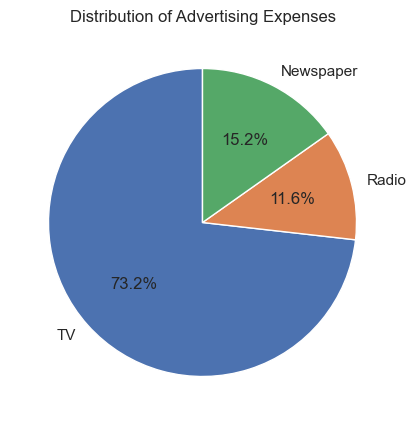

In [21]:
# Selecting columns for the pie chart
categories = ['TV', 'Radio', 'Newspaper']
values = Ad_df[categories].sum()

# Plotting the pie chart
plt.figure(figsize=(5,5))  # Adjust the figure size if needed
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Advertising Expenses')
plt.show()

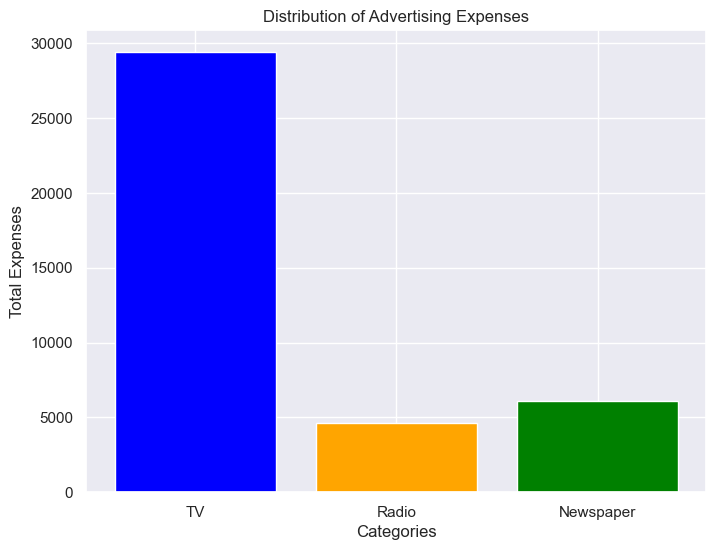

In [22]:
# Selecting columns for the bar chart
categories = ['TV', 'Radio', 'Newspaper']
values = Ad_df[categories].sum()

# Plotting the bar chart
plt.figure(figsize=(8,6))  #Adjust the figure size if needed
plt.bar(categories, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Expenses')
plt.title('Distribution of Advertising Expenses')
plt.show()

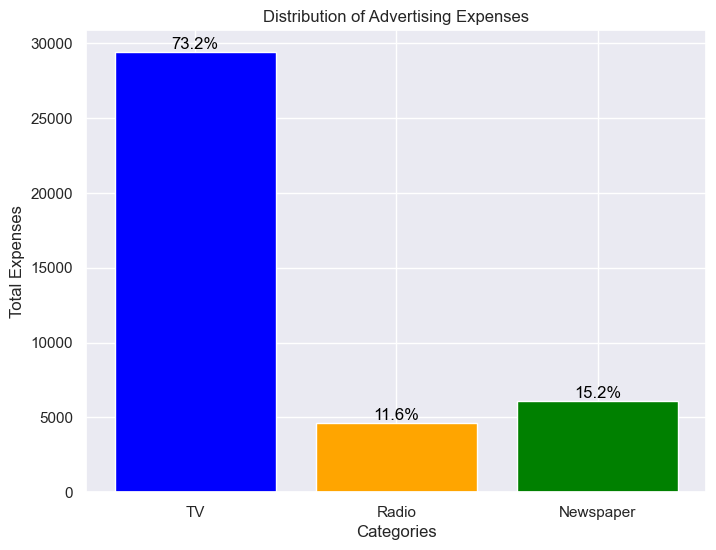

In [13]:
# Selecting columns for the bar chart


# Calculate percentages


# Plotting the bar chart with percentages


# Adding percentages on top of each bar




## Let us now start with the simple linear regression. We will use one feature at a time and have a look at the target variable. 

### Use Scatter Plot to visualize the impact of each of the advertising expenses to the impact of the revenues. Comment on your findings.

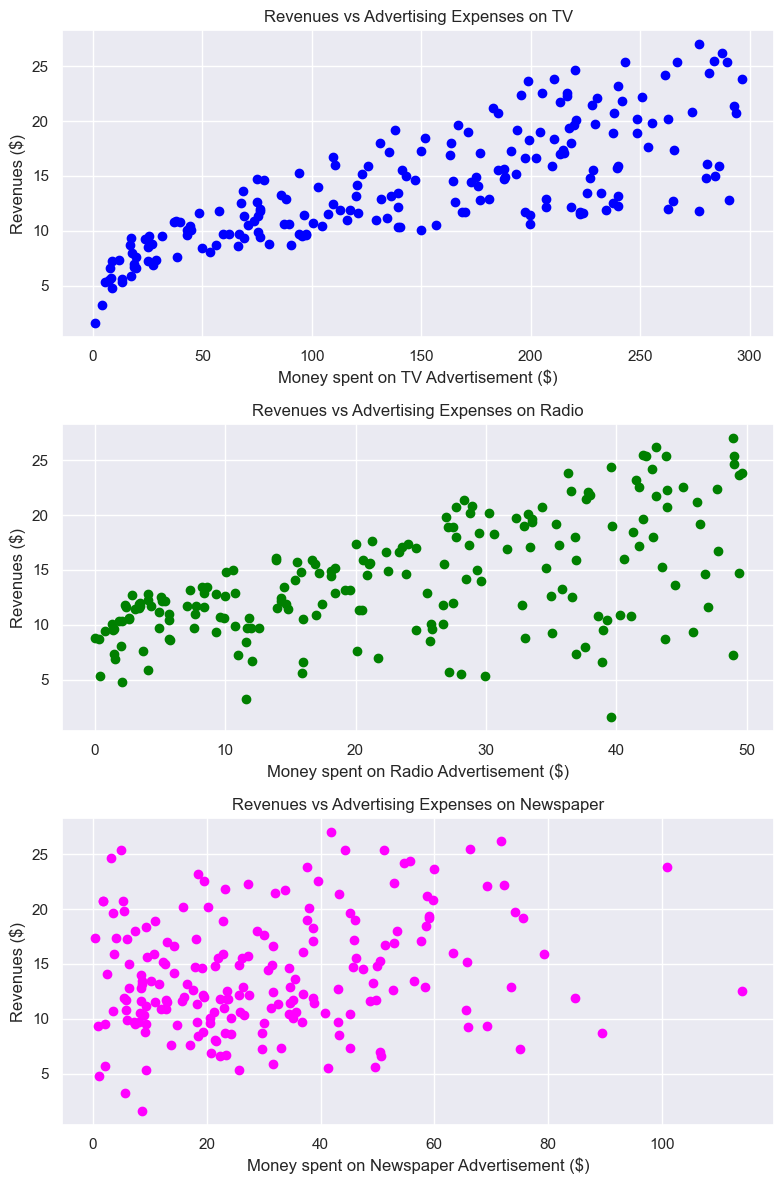

In [26]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plotting TV Advertisement
X_tv = Ad_df["TV"]
y_tv = Ad_df["Revenues"]
axes[0].scatter(X_tv, y_tv, c='blue')
axes[0].set_xlabel("Money spent on TV Advertisement ($)")
axes[0].set_ylabel("Revenues ($)")
axes[0].set_title('Revenues vs Advertising Expenses on TV')

# Plotting Radio Advertisement
X_radio = Ad_df["Radio"]
y_radio = Ad_df["Revenues"]
X_newspaper = Ad_df["Newspaper"]
axes[1].scatter(X_radio, y_radio, c='green')
axes[1].set_xlabel("Money spent on Radio Advertisement ($)")
axes[1].set_ylabel("Revenues ($)")
axes[1].set_title('Revenues vs Advertising Expenses on Radio')

# Plotting Newspaper Advertisement
X_newspaper = Ad_df["Newspaper"]
y_newspaper = Ad_df["Revenues"]
axes[2].scatter(X_newspaper, y_newspaper, c='magenta')
axes[2].set_xlabel("Money spent on Newspaper Advertisement ($)")
axes[2].set_ylabel("Revenues ($)")
axes[2].set_title('Revenues vs Advertising Expenses on Newspaper')

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()

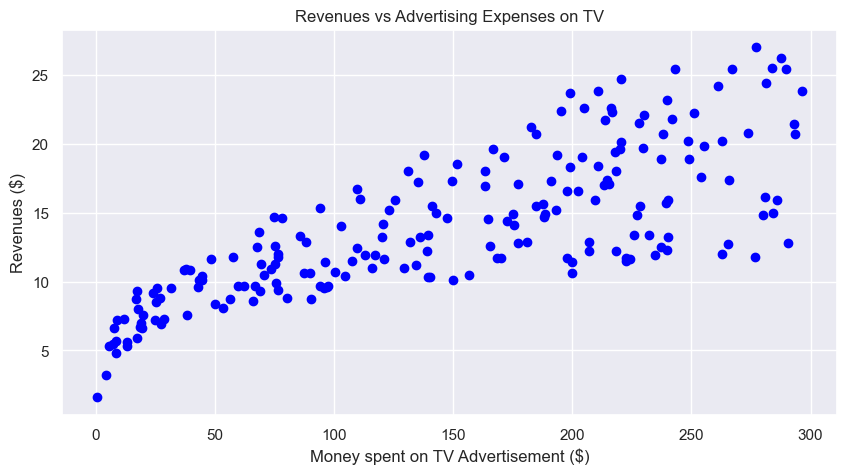

In [27]:
# Define feature columns
feature_cols = ["TV"]

# Define features (X) and target variable (y)
X = Ad_df[feature_cols]
y = Ad_df["Revenues"]

# Ploting a graph to see the points
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='blue')
plt.xlabel("Money spent on TV Advertisement ($)")
plt.ylabel("Revenues ($)")
plt.title('Revenues vs Advertising Expenses on TV')
plt.show()

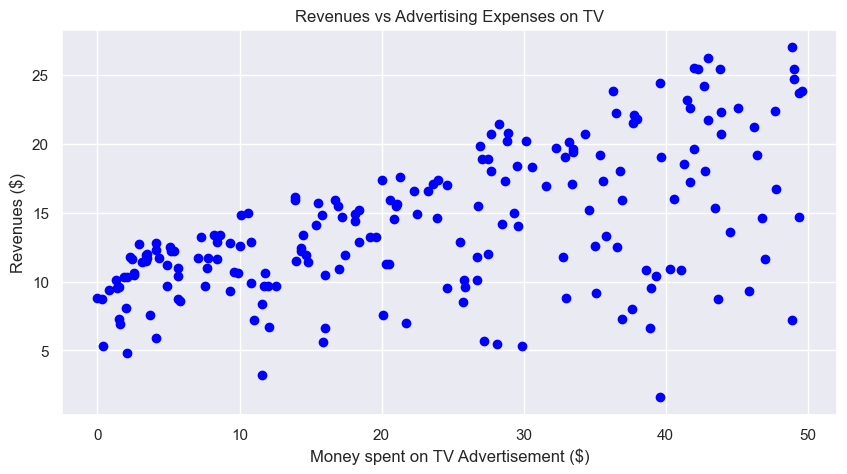

In [28]:
# Define feature columns
feature_cols = ["Radio"]

# Define features (X) and target variable (y)
X = Ad_df[feature_cols]
y = Ad_df["Revenues"]

# Ploting a graph to see the points
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='blue')
plt.xlabel("Money spent on TV Advertisement ($)")
plt.ylabel("Revenues ($)")
plt.title('Revenues vs Advertising Expenses on TV')
plt.show()

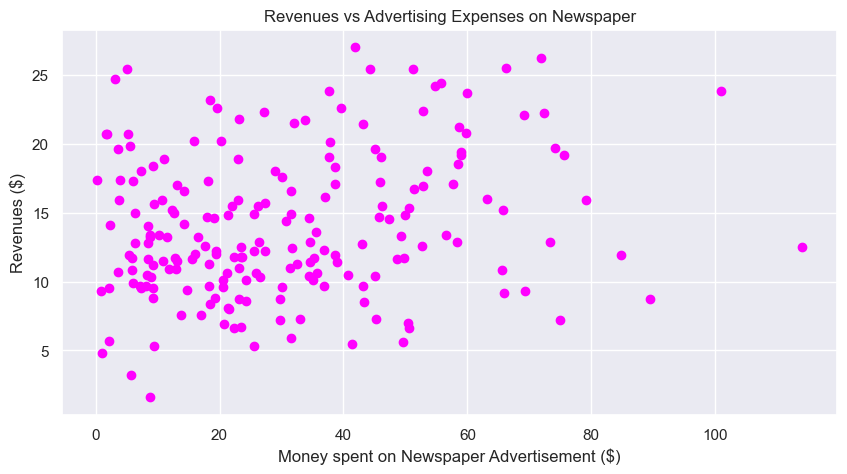

In [29]:
# Define feature columns
feature_cols = ["Newspaper"]

# Define features (X) and target variable (y)
X = Ad_df[feature_cols]
y = Ad_df["Revenues"]

# Ploting a graph to see the points
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='magenta')
plt.xlabel("Money spent on Newspaper Advertisement ($)")
plt.ylabel("Revenues ($)")
plt.title('Revenues vs Advertising Expenses on Newspaper')
plt.show()

### Conduct a pairplot analysis on the DataFrame and comment on your results and gain insights into the relationships between different variables.

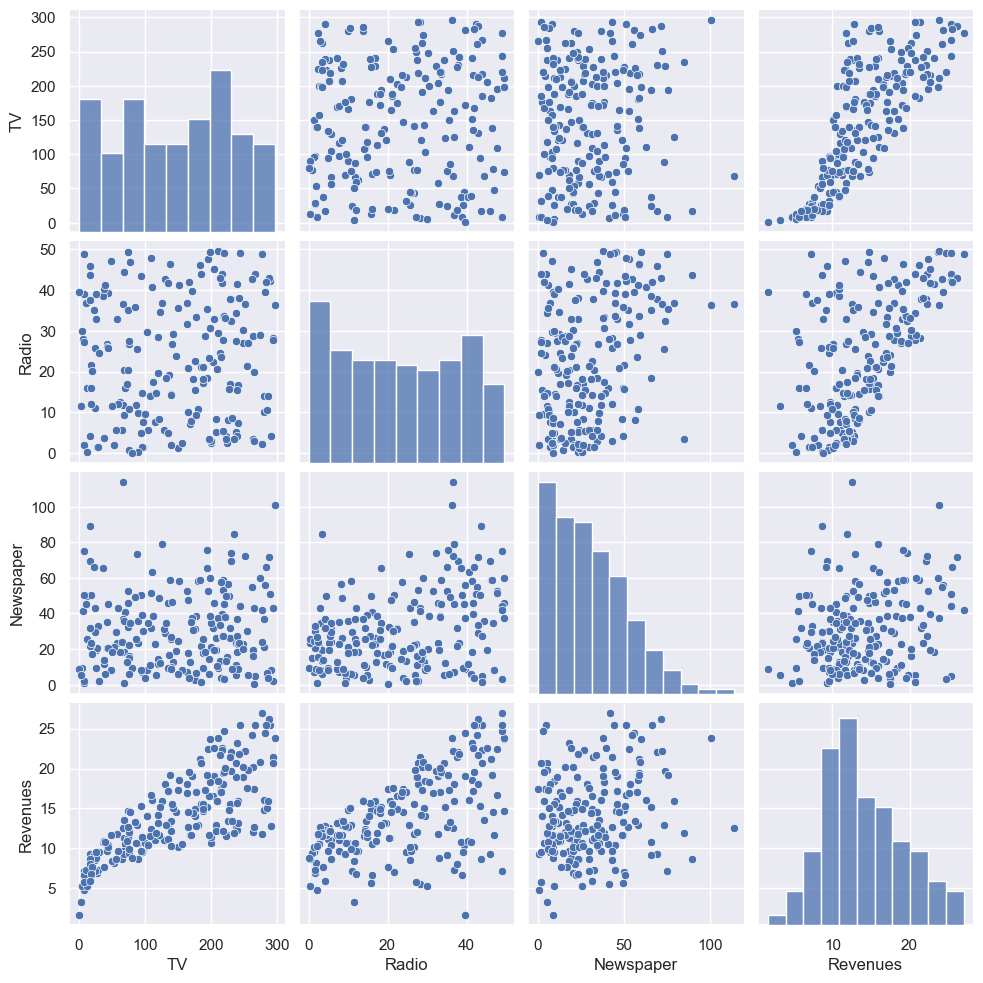

In [30]:
sns.pairplot(Ad_df)

<AxesSubplot:xlabel='Revenues'>

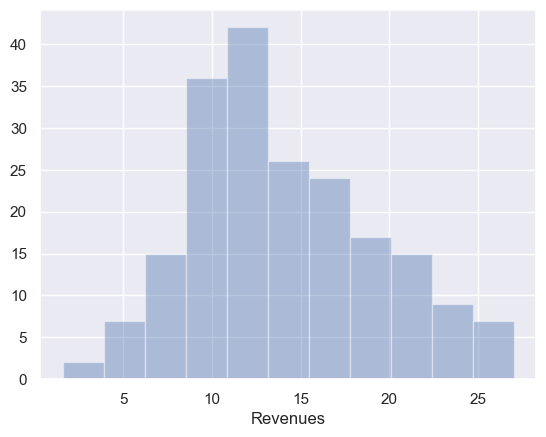

In [31]:
sns.distplot(Ad_df['Revenues'], kde=False)

### Perform a correlation analysis on the DataFrame using a heatmap and comment on the results on the Revenue feature.

<AxesSubplot:>

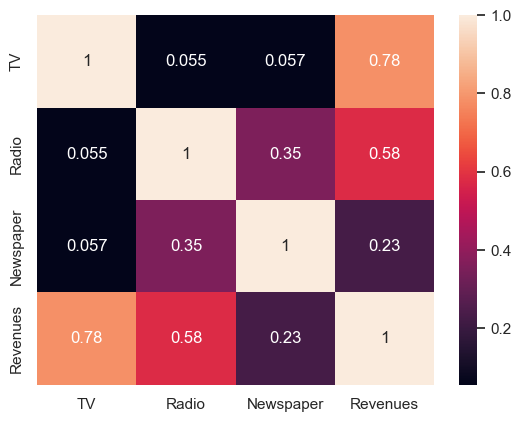

In [32]:
sns.heatmap(Ad_df.corr(), annot=True)

In [33]:
Ad_df.corr()['Revenues'].sort_values()

Newspaper    0.228299
Radio        0.576223
TV           0.782224
Revenues     1.000000
Name: Revenues, dtype: float64

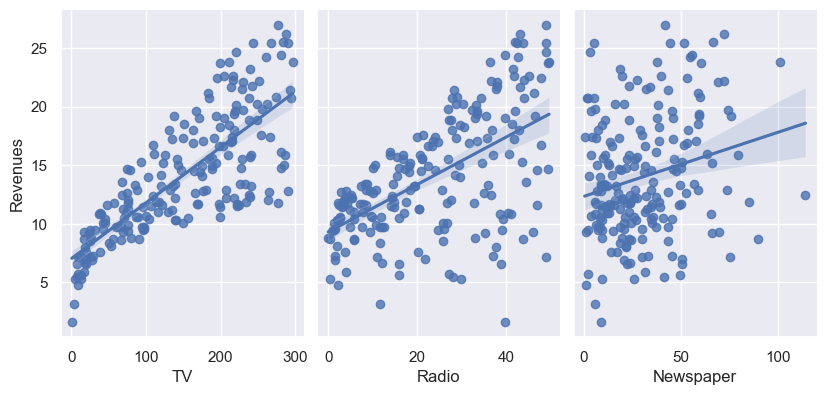

In [40]:
sns.pairplot(Ad_df, x_vars=Ad_df.columns[:3], height=4, aspect=0.7, y_vars=Ad_df.columns[3:], kind='reg')


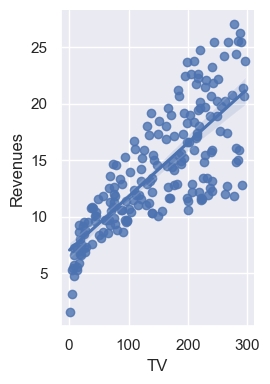

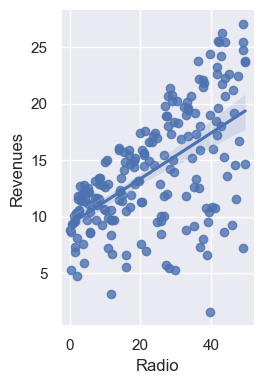

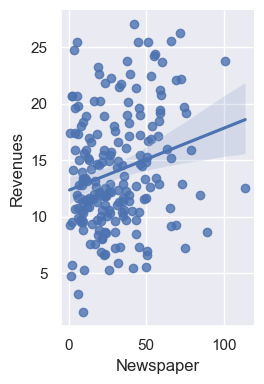

In [35]:
# Using lmplot to create scatterplots with regression lines
sns.lmplot(x='TV', y='Revenues', data=Ad_df, height=4, aspect=0.7)
sns.lmplot(x='Radio', y='Revenues', data=Ad_df, height=4, aspect=0.7)
sns.lmplot(x='Newspaper', y='Revenues', data=Ad_df, height=4, aspect=0.7)

## Model Development

### Implement the process of splitting a dataset into training and testing sets using the train_test_split function with a 70% : 30% ratio.

Let try with the following models and evaluate the models using MAE, MSE and R-Squared

- LinearRegression(),
- DecisionTreeRegressor(random_state=42),
- RandomForestRegressor(n_estimators=100, random_state=42),
- GradientBoostingRegressor(random_state=42)

**Let Start with the Single Feature of "TV"**

In [70]:
# Define feature columns
feature_cols = ["TV"]

# Define features (X) and target variable (y)
X = Ad_df[feature_cols]
y = Ad_df["Revenues"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(random_state=42)
    ]

# Iterate through each model
for model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print model evaluation metrics
    print(f"Model: {type(model).__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("\n" + "="*50 + "\n")

Model: LinearRegression
Mean Squared Error: 8.970991242413616
Mean Absolute Error: 2.2758809050205127
R-squared: 0.6714477229302764


Model: DecisionTreeRegressor
Mean Squared Error: 14.240166666666665
Mean Absolute Error: 2.8116666666666665
R-squared: 0.47847020939383555


Model: RandomForestRegressor
Mean Squared Error: 9.822515768092586
Mean Absolute Error: 2.438147222222221
R-squared: 0.6402616126853098


Model: GradientBoostingRegressor
Mean Squared Error: 10.561101454817818
Mean Absolute Error: 2.4546379248201005
R-squared: 0.613211758034087




**Let Start with the Single Feature of "Radio"**

In [71]:
# Define feature columns
feature_cols = ["Radio"]

# Define features (X) and target variable (y)
X = Ad_df[feature_cols]
y = Ad_df["Revenues"]


In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(random_state=42)
    ]

# Iterate through each model
for model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print model evaluation metrics
    print(f"Model: {type(model).__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("\n" + "="*50 + "\n")

Model: LinearRegression
Mean Squared Error: 23.723146496580334
Mean Absolute Error: 3.703326163720304
R-squared: 0.13116693684196767


Model: DecisionTreeRegressor
Mean Squared Error: 34.883208333333336
Mean Absolute Error: 4.2175
R-squared: -0.27755754294223256


Model: RandomForestRegressor
Mean Squared Error: 28.629841788842633
Mean Absolute Error: 3.6644638888888914
R-squared: -0.048535157118202


Model: GradientBoostingRegressor
Mean Squared Error: 27.737365171428106
Mean Absolute Error: 3.5875898564016517
R-squared: -0.01584922342821038




**Let Start with the Single Feature of "Newspaper"**

In [73]:
# Define feature columns
feature_cols = ["Newspaper"]

# Define features (X) and target variable (y)
X = Ad_df[feature_cols]
y = Ad_df["Revenues"]

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(random_state=42)
    ]

# Iterate through each model
for model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print model evaluation metrics
    print(f"Model: {type(model).__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("\n" + "="*50 + "\n")

Model: LinearRegression
Mean Squared Error: 28.869194440672988
Mean Absolute Error: 4.560287697533893
R-squared: -0.057301173788661064


Model: DecisionTreeRegressor
Mean Squared Error: 55.13286574074074
Mean Absolute Error: 5.996388888888889
R-squared: -1.0191780474446435


Model: RandomForestRegressor
Mean Squared Error: 44.05399077171604
Mean Absolute Error: 5.34948785714286
R-squared: -0.613426943683171


Model: GradientBoostingRegressor
Mean Squared Error: 38.910638084513955
Mean Absolute Error: 5.087726554830568
R-squared: -0.42505754374846827




**Observations:** We can see that TV has the highest R^2 value than Radio and Newspaper. The negative R^2 suggests that your model may not be a good fit for the data.

## Multiple Linear Regression

- Let us now build a multiple linear regression model.

In [51]:
# Define feature columns
feature_cols = ["TV", "Radio", "Newspaper"]

# Define features (X) and target variable (y)
X = Ad_df[feature_cols]
y = Ad_df["Revenues"]


In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(random_state=42)
]

# Iterate through each model
for model in models:
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    #Ecaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print model evaluation metrics
    print(f"Model: {type(model).__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print("\n" + "="*50 + "\n")

Model: LinearRegression
Mean Squared Error: 3.7967972367152227
Mean Absolute Error: 1.5116692224549089
R-squared: 0.8609466508230367


Model: DecisionTreeRegressor
Mean Squared Error: 1.5540000000000014
Mean Absolute Error: 0.9500000000000004
R-squared: 0.9430865302651902


Model: RandomForestRegressor
Mean Squared Error: 0.4600540666666661
Mean Absolute Error: 0.5690999999999988
R-squared: 0.9831510468470982


Model: GradientBoostingRegressor
Mean Squared Error: 0.6042825495115097
Mean Absolute Error: 0.5683351287478985
R-squared: 0.9778688438913147




**Observations:** 

## Performance assessment, testing and validation on Linear Regression

In [77]:
# Define feature columns
feature_cols = ["TV", "Radio", "Newspaper"]

# Define features (X) and target variable (y)
X = Ad_df[feature_cols]
y = Ad_df["Revenues"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit a linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lm.predict(X_test)

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': lm.coef_})

# Print or visualize the feature importance
print(feature_importance_df)

     Feature  Coefficient
0         TV     0.044059
1      Radio     0.199287
2  Newspaper     0.006882


### Let visualizes the relationship between the actual revenues (Actual Revenues) and the predicted revenues (Predicted Revenues) with a line that represents the linear regression model's fit.

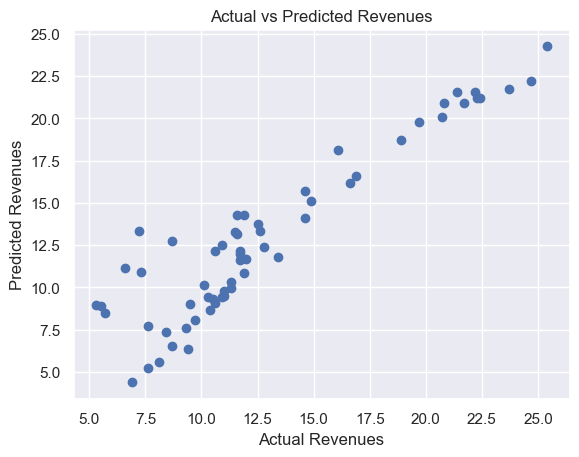

In [78]:
#creates a scatter plot with y_test on the x-axis and y_pred on the y-axis.
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Revenues")
plt.ylabel("Predicted Revenues")
plt.title("Actual vs Predicted Revenues")
plt.show()

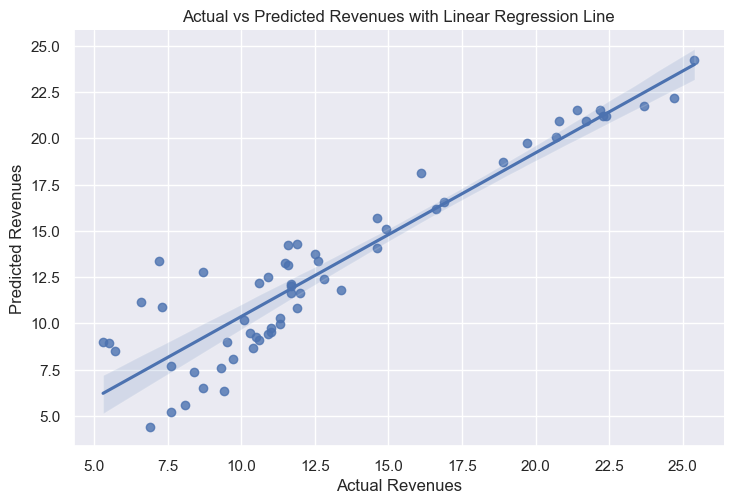

In [81]:
# Assuming y_test and y_pred are your actual and predicted values
df_lmplot = pd.DataFrame({'Actual Revenues': y_test, 'Predicted Revenues': y_pred})

# Create an lmplot with specific height and aspect to control width
sns.lmplot(x='Actual Revenues', y='Predicted Revenues', data=df_lmplot, height=5, aspect=1.5)
plt.xlabel("Actual Revenues")
plt.ylabel("Predicted Revenues")
plt.title("Actual vs Predicted Revenues with Linear Regression Line")
plt.show()

**Observations**


## Residuals 

### Create a distribution plot of residuals in your regression analysis. It helps you check whether the residuals (the differences between actual and predicted values) follow a normal distribution

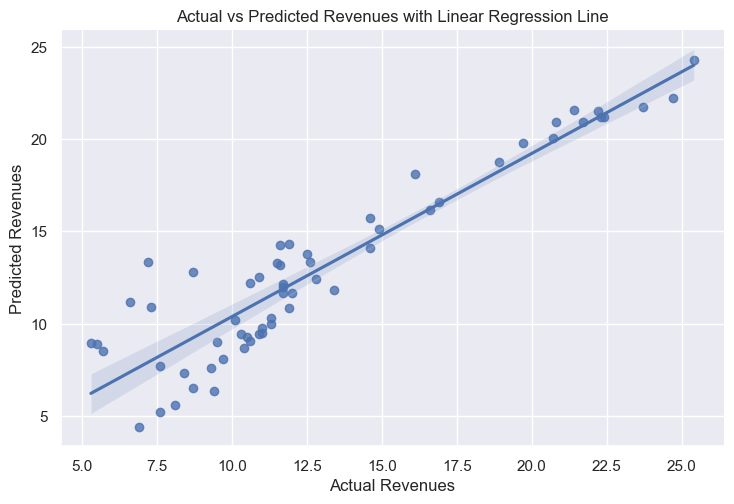

In [82]:
# Assuming y_test and y_pred are your actual and predicted values
df_lmplot = pd.DataFrame({'Actual Revenues': y_test, 'Predicted Revenues': y_pred})

# Create an lmplot with specific height and aspect to control width
sns.lmplot(x='Actual Revenues', y='Predicted Revenues', data=df_lmplot, height=5, aspect=1.5)
plt.xlabel("Actual Revenues")
plt.ylabel("Predicted Revenues")
plt.title("Actual vs Predicted Revenues with Linear Regression Line")
plt.show()

### The residuals are normally distributed, it suggests that your model is making unbiased predictions

## Performance assessment, testing and validation on Gradient Boosting Regression

In [64]:
# Define feature columns
feature_cols = ["TV", "Radio", "Newspaper"]

# Define features (X) and target variable (y)
X = Ad_df[feature_cols]
y = Ad_df["Revenues"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit a Gradient Boosting regression model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': lm.coef_})

# Print or visualize the feature importance
print(feature_importance_df)

     Feature  Coefficient
0         TV     0.044059
1      Radio     0.199287
2  Newspaper     0.006882


### Let visualizes the relationship between the actual revenues (Actual Revenues) and the predicted revenues (Predicted Revenues) with a line that represents the linear regression model's fit.¶

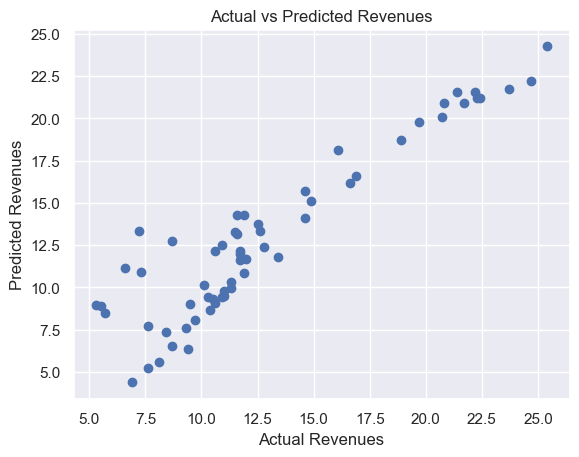

In [83]:
#creates a scatter plot with y_test on the x-axis and y_pred on the y-axis.
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Revenues")
plt.ylabel("Predicted Revenues")
plt.title("Actual vs Predicted Revenues")
plt.show()

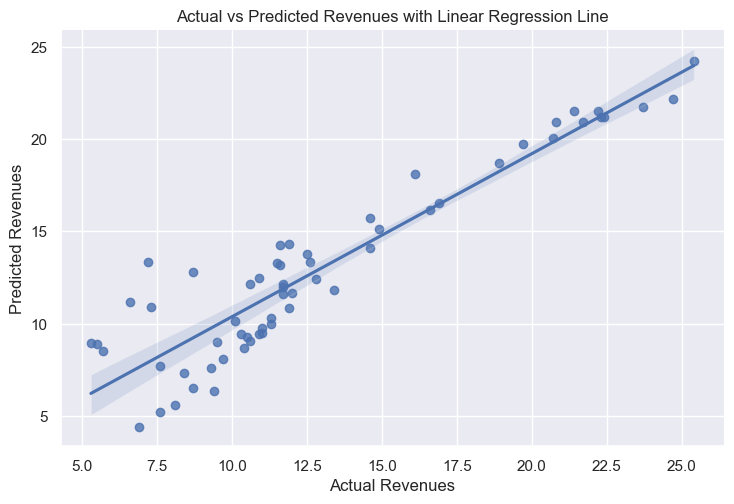

In [84]:
# Assuming y_test and y_pred are your actual and predicted values
df_lmplot = pd.DataFrame({'Actual Revenues': y_test, 'Predicted Revenues': y_pred})

# Create an lmplot with specific height and aspect to control width
sns.lmplot(x='Actual Revenues', y='Predicted Revenues', data=df_lmplot, height=5, aspect=1.5)
plt.xlabel("Actual Revenues")
plt.ylabel("Predicted Revenues")
plt.title("Actual vs Predicted Revenues with Linear Regression Line")
plt.show()

## Residuals 

### Create a distribution plot of residuals in your regression analysis. It helps you check whether the residuals (the differences between actual and predicted values) follow a normal distribution

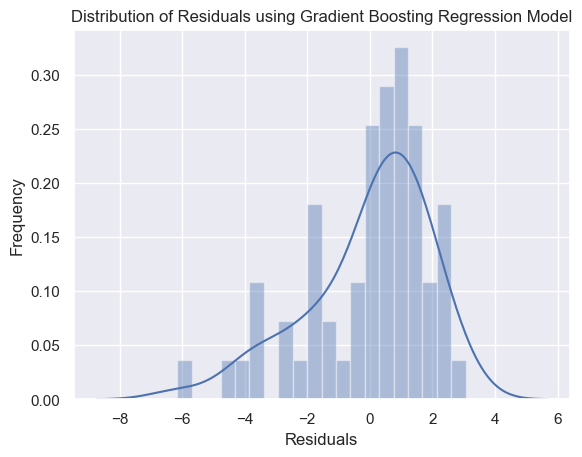

In [86]:
# Assuming y_test and y_pred are your actual and predicted values
sns.distplot((y_test - y_pred), bins=20)

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals using Gradient Boosting Regression Model")
plt.show()

**Observations:** 